# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
import pandas as pd

df = pd.read_csv('vehicles.csv')




In [2]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

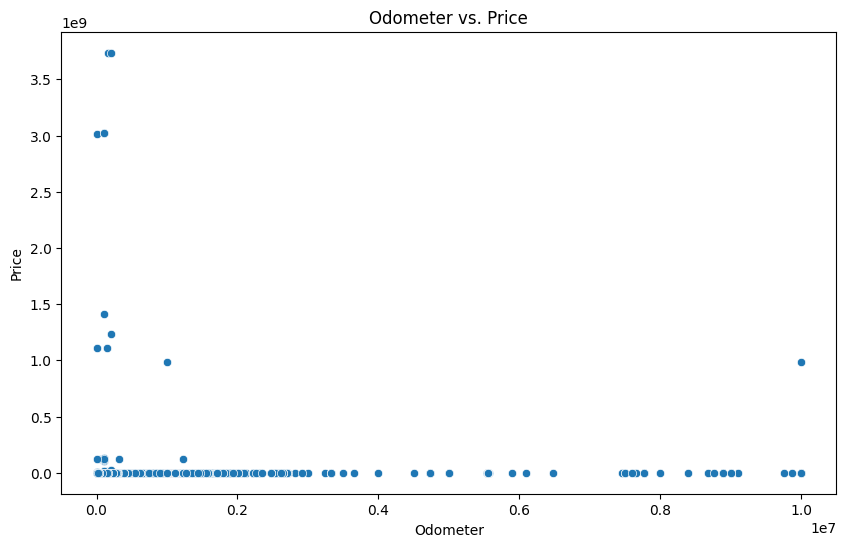

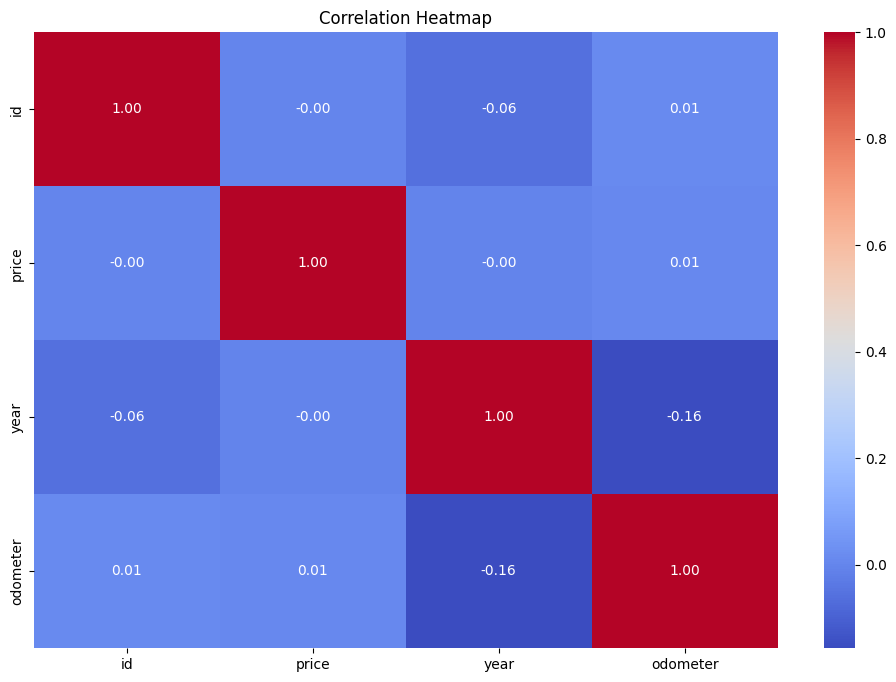

The 'condition' column is not present in the DataFrame.


In [3]:
import pandas as pd

df = pd.read_csv('vehicles.csv')
print(df.info())

# Print unique values of each column
for column in df.columns:
    print(column, ":", df[column].unique())

# Identify non-numeric columns
non_numeric_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        non_numeric_columns.append(column)
print("Non-numeric Columns:", non_numeric_columns)

# Drop non-numeric columns or encode them if necessary
df = df.drop(columns=non_numeric_columns)

# Check for missing values and decide on handling strategies (imputation or removal)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Explore the distribution of each feature (histograms, box plots) to understand their range and spread
print("Summary Statistics:\n", df.describe())

correlation_matrix = df.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with Price:\n", price_correlation)

# Visualize relationships between different features and car prices (scatter plots, heatmaps)
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for odometer vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Odometer vs. Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# If 'condition' column is present, visualize its relationship with price
if 'condition' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='condition', y='price', data=df)
    plt.title('Condition vs. Price')
    plt.xlabel('Condition')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'condition' column is not present in the DataFrame.")


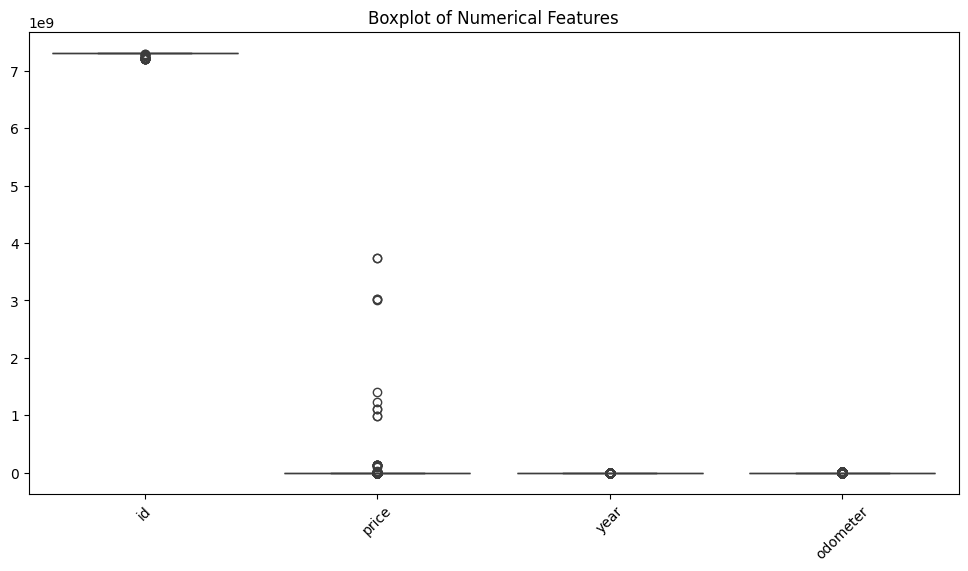

Number of outliers detected: 1107
<class 'pandas.core.frame.DataFrame'>
Index: 425773 entries, 0 to 426879
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           425773 non-null  int64  
 1   price        425773 non-null  int64  
 2   year         425773 non-null  float64
 3   odometer     425773 non-null  float64
 4   vehicle_age  425773 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 19.5 MB
None


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Handling missing values
# Impute missing numerical values with median
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Impute missing categorical values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# Feature Engineering
# Create a new feature 'vehicle_age' from 'year'
df['vehicle_age'] = 2024 - df['year']

# Outlier Detection and Treatment
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Detect outliers using z-score method
z_scores = zscore(df[numerical_columns])
outliers = (z_scores > 3).any(axis=1)
outliers_df = df[outliers]
print("Number of outliers detected:", len(outliers_df))

# Remove outliers
df = df[~outliers]

# Updated dataset information
print(df.info())


In [11]:
# Check the columns in the DataFrame
print(df.columns)


Index(['id', 'price', 'year', 'odometer', 'vehicle_age'], dtype='object')


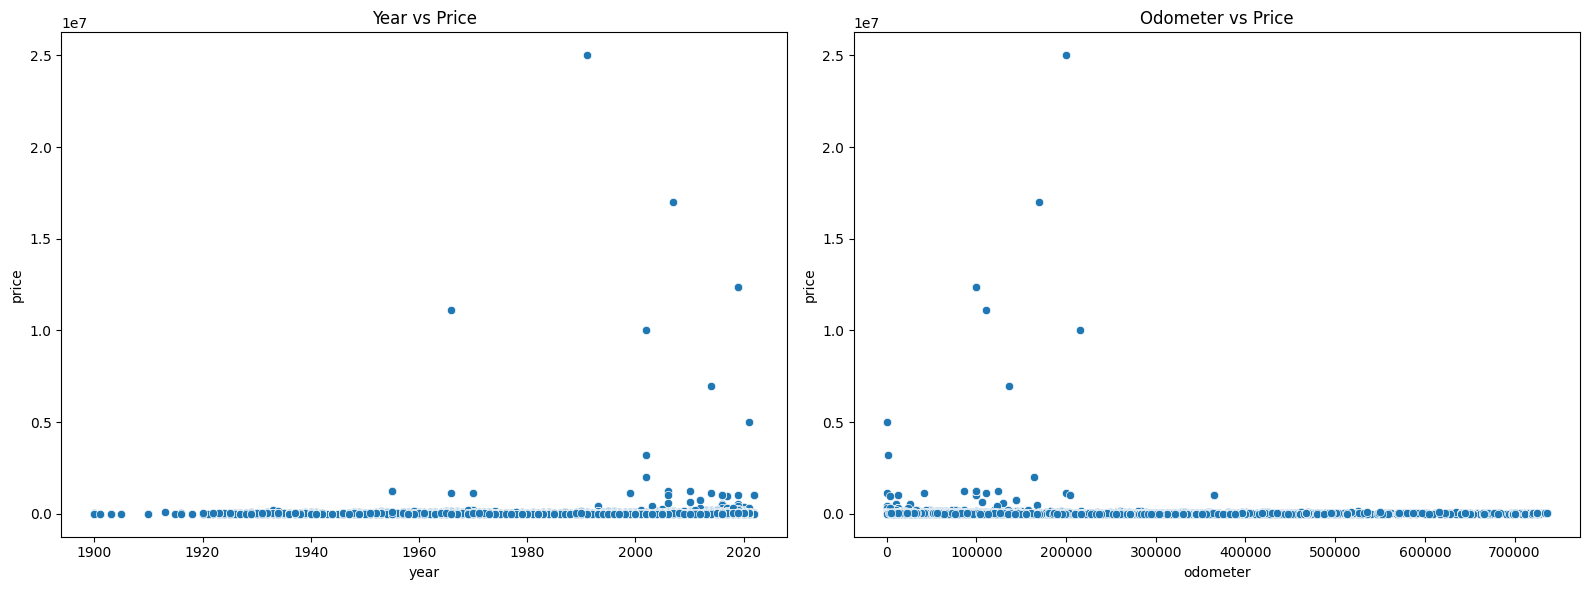

In [12]:
# Visualize relationships between features and the target variable 'price'
plt.figure(figsize=(16, 6))

# Scatter plot for 'year' vs 'price'
plt.subplot(1, 2, 1)
sns.scatterplot(x='year', y='price', data=df)
plt.title('Year vs Price')

# Scatter plot for 'odometer' vs 'price'
plt.subplot(1, 2, 2)
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Odometer vs Price')

plt.tight_layout()
plt.show()


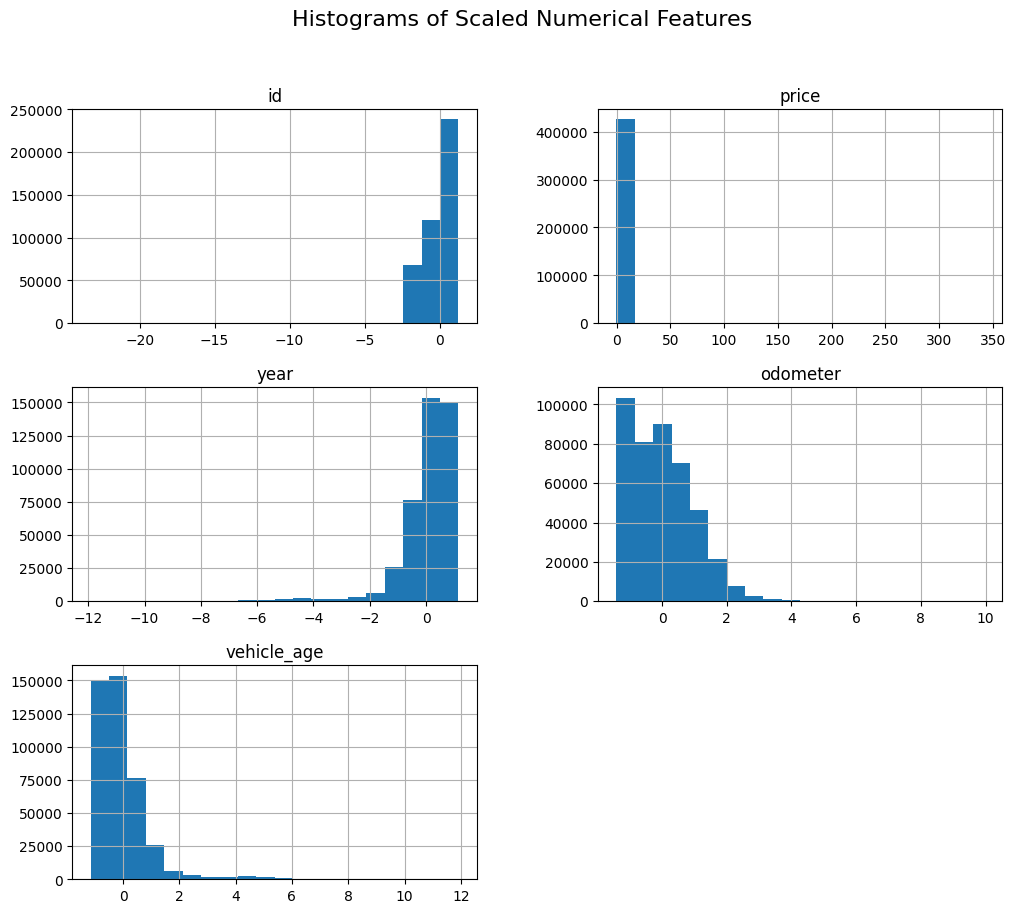

In [13]:

from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Scale numerical variables
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Plot histograms of scaled numerical features
df[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Scaled Numerical Features', fontsize=16)
plt.show()

# Plot boxplots of encoded categorical features vs. price
for column in label_encoders.keys():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], y=df['price'])
    plt.title(f'{column.capitalize()} vs Price')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.show()


In [14]:
# Handling missing values
df.dropna(subset=['year', 'odometer'], inplace=True)  # Remove rows with missing values in 'year' and 'odometer')

# Removing irrelevant columns
df.drop(columns=['id'], inplace=True)

# Data type conversion
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

# Handling outliers (example)
# You can define a function to detect and handle outliers
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = handle_outliers(df, 'price')
df = handle_outliers(df, 'odometer')


# Assuming a reasonable range for 'year' is between 1900 and current year
df = df[(df['year'] >= 1900) & (df['year'] <= 2022)]

# Feature engineering (example)
df['car_age'] = 2022 - df['year']

# Display summary statistics after cleaning
print(df.describe())


       price  year  odometer  vehicle_age  car_age
count    0.0   0.0       0.0          0.0      0.0
mean     NaN   NaN       NaN          NaN      NaN
std      NaN   NaN       NaN          NaN      NaN
min      NaN   NaN       NaN          NaN      NaN
25%      NaN   NaN       NaN          NaN      NaN
50%      NaN   NaN       NaN          NaN      NaN
75%      NaN   NaN       NaN          NaN      NaN
max      NaN   NaN       NaN          NaN      NaN


In [16]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
df = pd.read_csv('vehicles.csv')

# Check if the dataset is empty
if df.empty:
    print("The dataset is empty.")
else:
    # Check if all values are missing (NaN)
    if df.isnull().all().all():
        print("All values in the dataset are missing.")
    else:
        print("The dataset is not empty, but some values may be missing.")

# Optionally, you can print the first few rows of the dataset for further investigation
print(df.head())


The dataset is not empty, but some values may be missing.
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  

In [17]:
# Count missing values in each column
missing_values_count = df.isnull().sum()

# Print the count of missing values in each column
print("Missing values in each column:")
print(missing_values_count)


Missing values in each column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer



# Impute missing values in numerical columns with median
num_imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute missing values in categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Impute missing values if necessary

df_cleaned['year'].fillna(df_cleaned['year'].median(), inplace=True)
df_cleaned['odometer'].fillna(df_cleaned['odometer'].median(), inplace=True)





# Drop columns with a high percentage of missing values
threshold = 0.3  # Adjust as needed
missing_percentage = df.isnull().mean()
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=cols_to_drop)

# Drop rows with missing values
df = df.dropna()

# Now, let's address outliers. We'll filter out extreme values in 'Year' and 'Odometer' columns.


# Filter out unrealistic values in 'Year' column
df = df[(df['year'] >= 1900) & (df['year'] <= 2024)]

# Filter out unrealistic values in 'Odometer' column
odometer_threshold = 1000000  # Adjust as needed
df = df[df['odometer'] < odometer_threshold]
print(df.describe())

# 1. Price outliers
price_outliers = df[(df['price'] == 0) | (df['price'] > 57112)]
print("Price outliers:")
print(price_outliers)

# 2. Year outliers
year_outliers = df[(df['year'] < 1900) | (df['year'] > 2022)]
print("\nYear outliers:")
print(year_outliers)

# 3. Odometer outliers
odometer_outliers = df[(df['odometer'] == 0) | (df['odometer'] > 278044)]
print("\nOdometer outliers:")
print(odometer_outliers)



# Addressing missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


# Remove rows with price outliers
df_cleaned = df[~df['price'].isin(price_outliers['price'])]

# Remove rows with year outliers
df_cleaned = df_cleaned[~df_cleaned['year'].isin(year_outliers['year'])]

# Remove rows with odometer outliers
df_cleaned = df_cleaned[~df_cleaned['odometer'].isin(odometer_outliers['odometer'])]


# Impute missing values if necessary

df_cleaned['year'].fillna(df_cleaned['year'].median(), inplace=True)
df_cleaned['odometer'].fillna(df_cleaned['odometer'].median(), inplace=True)



# Display cleaned dataset
print("\nCleaned dataset:")
print(df_cleaned.head())
df_cleaned


                 id         price           year       odometer
count  4.262410e+05  4.262410e+05  426241.000000  426241.000000
mean   7.311487e+09  7.268757e+04    2011.265458   92456.655770
std    4.472983e+06  1.209573e+07       9.383593   70276.055422
min    7.207408e+09  0.000000e+00    1900.000000       0.000000
25%    7.308143e+09  5.900000e+03    2008.000000   38050.000000
50%    7.312621e+09  1.397600e+04    2013.000000   85548.000000
75%    7.315254e+09  2.649900e+04    2017.000000  132631.000000
max    7.317101e+09  3.736929e+09    2022.000000  999999.000000
Price outliers:
                  id   region    price    year manufacturer     model  \
10      7.218893e+09  el paso      0.0  2013.0         ford     f-150   
11      7.218326e+09  el paso      0.0  2013.0         ford     f-150   
12      7.217788e+09  el paso      0.0  2013.0         ford     f-150   
13      7.217148e+09  el paso      0.0  2013.0         ford     f-150   
14      7.209028e+09  el paso      0.0  201

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7.222696e+09,prescott,6000.0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,az
1,7.218892e+09,fayetteville,11900.0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ar
2,7.221798e+09,florida keys,21000.0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,fl
3,7.222271e+09,worcester / central MA,1500.0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ma
4,7.210384e+09,greensboro,4900.0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7.301591e+09,wyoming,23590.0,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,full-size,sedan,white,wy
426876,7.301591e+09,wyoming,30590.0,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,full-size,sedan,red,wy
426877,7.301591e+09,wyoming,34990.0,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,1GYFZFR46LF088296,4wd,full-size,hatchback,white,wy
426878,7.301591e+09,wyoming,28990.0,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,full-size,sedan,silver,wy


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Perform sparse one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df_cleaned, drop_first=True, sparse=True)



# Define features (X) and target (y)
X = df_encoded.drop(columns=['price'])
y =df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regression algorithms to experiment with
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

# Iterate over each regression algorithm
for model_name, model in models.items():
    print("Training", model_name)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the testing data
    predictions = model.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(model_name, "RMSE:", rmse)   


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.